# K-Means Clustering

<img src="kMeansClustering.png" alt="Effects of K-Means Clustering" width="700px;"/>

Clustering algorithms group the dataset into classifications without user specification. This can be helpful to see patterns and trends within the code that the user might've not noticed themselves. With K-Means clustering, the user can specify the number of clusters they believe the dataset could be split into; the algorithm determines these clusters.<br>

## Algorithm:
1. Choose a K number of clusters.

> For example, K = 2

2. Select K random points. These points will be in the range of the dataset, but won't be selected from the datapoints in the dataset. These K random points are called centroids because the clusters will be formed around them.

<img src="randomDatapoints.png" alt="Random Datapoints are selected on the graph." width="500px;"/>

3. Assign each datapoint to the closest centroid to form K clusters.

<img src="formClusters.png" alt="K Clusters are formed with random centroids." width="500px;"/>

4. Figure out the new center position for the centroids based on the closest clusters, and re-classify the datapoints. If the classification of any datapoint changed, repeat step 4.

__Loop 1:__
<img src="step4.png" alt="Data points are reassigned, classifications changed." width="900px;"/>
__Loop 2:__
<img src="redo1.png" alt="Data points are reassigned, classifications changed." width="900px;"/>
__Loop 3:__
<img src="redo2.png" alt="Data points are reassigned, classifications changed." width="900px;"/>
__Loop 4:__
<img src="redo3.png" alt="Data points are reassigned, classifications changed." width="900px;"/>

Now that the datapoints have been clustered, the final classification regions can be created:

<img src="KComplete.png" alt="The completed classification regions." width="500px;"/>


<hr>

## Code

__Setting up the Dataset:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('mall.csv')
X = dataset.iloc[:, [3, 4]].values

<hr>

__Determining Optimal # of Clusters:__


* __max_iter__: The number of iterations the KMeans algorithm is allowed to loop, until deciding that the classifications cannot be determined for the given random initial state.

* __n_init__: The number of attempts the KMeans algorithm will make to figure out the best fitting model.

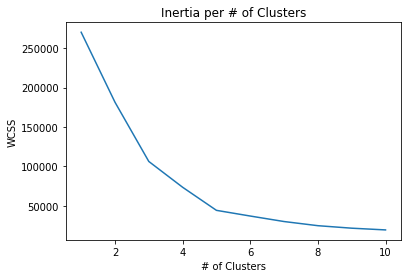

In [2]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0);
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Inertia per # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

<hr>

__Predicting Clustering Results:__

In [3]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(X)

<hr>

__Plotting Optimal KMeans Results:__

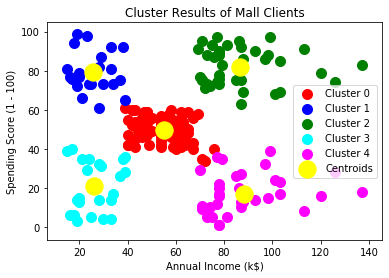

In [4]:
# Scatters the datapoints, color-coding them by their respective classification.
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range (0, 5):
    plt.scatter(X[y == (i), 0], X[y == (i), 1], s = 100, c = colors[i], label = f'Cluster {i}')

# Plotting the centroids of each cluster.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Labeling the graph and adding the legend.
plt.title('Cluster Results of Mall Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()

plt.show()

<hr>

__Replotting Graph With More Accurate Labels:__

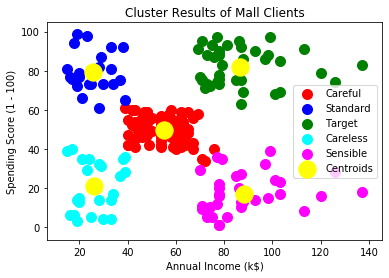

In [5]:
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
for i in range (0, 5):
    plt.scatter(X[y == (i), 0], X[y == (i), 1], s = 100, c = colors[i], label = labels[i])

# Plotting the centroids of each cluster.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    
# Labeling the graph and adding the legend.
plt.title('Cluster Results of Mall Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
    
plt.show()